# **Problem #1**

*   Apply only **Neural Network / Deep Neural Network** for the **NumtaDB** dataset and build a multiclass classification model that can recognize `[0-9]` Bengali handwritten digits with different hyperparameter settings.  

##Introduction

Recognizing handwritten digits is not an easy task. Rather, humans are quite good at making sense of what our eyes show us. But nearly all that work is done unconsciously. And so we don't usually appreciate how tough a problem our visual systems solve.


In this experiment we are going to use **Deep neural network** to recognize Bengali handwritten digits. Neural networks are also **called feedforward neural networks** where the output from one layer is used as input to the next layer. This means there are no loops in the network - information is always fed forward, never fed back. This is the type of approach we are going to take. There may be multiple hidden layers in between the input and the output. If there is only one/two hidden layers it is called a **shallow neural network**. 


For example, the following **two-layer network** has ***two*** **hidden layers**: 

<div align="center">
<img src="https://drive.google.com/uc?export=view&id=166QVjs64g0Q1KsxiokYQNTHbGyBlydOT" width="500">
</div>

The following steps occur in this neural network:


*   Input is passed through the 1st hidden layer.
*   The 1st hidden layers is connected to all the nodes of the input layer which then computes output and passes to the 2nd hidden layer.
*   The 2nd hidden layer computes output and passed to the final output layer which gives a final result.



The dataset we'll be using is the  **NumtaDB: Bengali Handwritten Digits** dataset, a dataset of 28x28 black and white images consisting of handwritten Bengali digits, 0 to 9. It contains 5 training samples with different types of black and white images. 
<div align="center">
<img src="https://drive.google.com/uc?export=view&id=1YIyqdg82RnrQM5pfKidLtWHdpOiGJ3nN" width="500">
</div>

**Dataset Link:** https://www.kaggle.com/BengaliAI/numta/







**Data Processing**

Let's start by importing all of the modules we'll need. The main ones we need to import are:
- torch for general PyTorch functionality
- torch.nn and torch.nn.functional for neural network based functions
- torch vision is a part of PyTorch which consists of popular datasets,model, architectures and frequently used for image transformation.
- torchvision.transforms for data augmentation.
- torchvision.datasets for loading the dataset
- torch.optim for our optimizer which will update the parameters of our neural network
- torch.utils.data and torch.utils.data.sampler for handling the dataset  
- matplotlib for plotting
- PIL is python imaging library used to handle images.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms, models
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

## Loading and Procesing NumtaDB Dataset


**Importing Dataset From Kaggle**

This dataset is available in kaggle, which helps us to train and use the dataset faster.

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"marufakamallabonno","key":"296735e68c21a45a5f703c68a3815e76"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json # changing permission

In [ ]:
!kaggle datasets download -d BengaliAI/numta

100% 1.90G/1.91G [00:18<00:00, 15.8MB/s]
100% 1.91G/1.91G [00:18<00:00, 110MB/s] 


The **Zip file** is downloaded in the root folder which is now unzipped to extract the files in it.

In [ ]:
from zipfile import ZipFile
f_name= 'numta.zip'
with ZipFile(f_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import os
from os import path
TRAIN_PATH = 'trainImage'
os.mkdir(TRAIN_PATH)

Now that the datas are imported in the root folder, how should the dataset be arranged in a better way?

All the images are now kept in a single folder `.trainImage`. in order to access all the images easier

In [ ]:


def processImages(folder_name):
  src = folder_name + '/'
  dir_folders = os.listdir(src)
  for dir_name in dir_folders:
    file_name = os.path.join(src, dir_name)
    if os.path.isfile(file_name):
      shutil.copy(file_name, TRAIN_PATH)  

In [ ]:
import shutil
processImages('training-a')
print('A Done')
processImages('training-b')
print('B Done')
processImages('training-c')
print('C Done')
processImages('training-d')
print('D Done')
processImages('training-e')
print('E Done')

A Done
B Done
C Done
D Done
E Done


Content of all the images stored in a folder.

In [ ]:
os.listdir('/content/trainImage')

['d00118.png',
 'd10159.png',
 'a07364.png',
 'a17193.png',
 'a15159.png',
 'c15709.png',
 'a07793.png',
 'c15320.png',
 'd06975.png',
 'c11889.png',
 'e01801.png',
 'e12363.png',
 'c03853.png',
 'e14815.png',
 'c09639.png',
 'e13153.png',
 'd09905.png',
 'e02827.png',
 'c18372.png',
 'a02982.png',
 'a03316.png',
 'a06414.png',
 'a14674.png',
 'c00330.png',
 'c00846.png',
 'c09119.png',
 'a14510.png',
 'e08410.png',
 'd01412.png',
 'e13487.png',
 'a07822.png',
 'c10983.png',
 'e09837.png',
 'a12995.png',
 'a01012.png',
 'c12321.png',
 'c13699.png',
 'd08438.png',
 'd01627.png',
 'a16536.png',
 'a17808.png',
 'a17002.png',
 'e14091.png',
 'c23045.png',
 'd07430.png',
 'd04278.png',
 'a16688.png',
 'a18774.png',
 'e11064.png',
 'c21913.png',
 'd04058.png',
 'd09021.png',
 'd00058.png',
 'c05649.png',
 'c16118.png',
 'a17057.png',
 'c01272.png',
 'c08143.png',
 'd08816.png',
 'd06890.png',
 'e11689.png',
 'a13773.png',
 'c05341.png',
 'd01374.png',
 'd08601.png',
 'd05981.png',
 'a18273.p

Using the **pandas** library the csv files are imported.
Only the necessary columns are kept dropping the remaining columns.

In [ ]:
def showRawTrainingSamples(csv_filename):
  df = pd.read_csv(csv_filename)
  print(csv_filename)
  print(df.columns)
  return df

In [ ]:
import pandas as pd
a_csv = showRawTrainingSamples('training-a.csv')
b_csv = showRawTrainingSamples('training-b.csv')
c_csv = showRawTrainingSamples('training-c.csv')
d_csv = showRawTrainingSamples('training-d.csv')
e_csv = showRawTrainingSamples('training-e.csv')

training-a.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')
training-b.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')
training-c.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')
training-d.csv
Index(['original filename', 'scanid', 'digit', 'num', 'database name original',
       'database name', 'filename'],
      dtype='object')
training-e.csv
Index(['filename', 'original filename', 'districtid', 'institutionid',
       'gender', 'age', 'datestamp', 'scanid', 'digit',
       'database name original', 'database name'],
      dtype='object')


In [ ]:
def truncateColumns(csv_file):
  csv_file = csv_file[['filename', 'digit']]
  print(csv_file)
  print(csv_file.iloc[:5, :])   #First 5 Rows of the CSV File
  print("=============================")
  return csv_file

Only the **filename** and the **digit** column is kept while the rest are dropped.

In [ ]:
a_csv = truncateColumns(a_csv)
b_csv = truncateColumns(b_csv)
c_csv = truncateColumns(c_csv)
d_csv = truncateColumns(d_csv)
e_csv = truncateColumns(e_csv)

         filename  digit
0      a00000.png      5
1      a00001.png      3
2      a00002.png      1
3      a00003.png      7
4      a00004.png      0
...           ...    ...
19697  a19697.png      4
19698  a19698.png      3
19699  a19699.png      8
19700  a19700.png      3
19701  a19701.png      8

[19702 rows x 2 columns]
     filename  digit
0  a00000.png      5
1  a00001.png      3
2  a00002.png      1
3  a00003.png      7
4  a00004.png      0
       filename  digit
0    b00000.png      0
1    b00001.png      2
2    b00002.png      5
3    b00003.png      2
4    b00004.png      5
..          ...    ...
354  b00354.png      5
355  b00355.png      9
356  b00356.png      2
357  b00357.png      1
358  b00358.png      2

[359 rows x 2 columns]
     filename  digit
0  b00000.png      0
1  b00001.png      2
2  b00002.png      5
3  b00003.png      2
4  b00004.png      5
         filename  digit
0      c00000.png      6
1      c00001.png      1
2      c00002.png      3
3      c00003.png     

All the csv files are now merged together in order to prepare a **single csv file**. There are a totla of **72045** images in this dataset.

In [ ]:
total_csv = [a_csv,b_csv,c_csv,d_csv,e_csv]
merged_csv = pd.concat(total_csv)
print(len(merged_csv))

72045


## Preparing the Training Dataset

A **custom dataset class** is built in order to create the training dataset which contains both the images and the label of the images collected from the csv files.

The functions that we use in this custom dataset are:
- **`__len__`**: This returns the size of the entire train dataset.

- **`__getitem__`**: Fetches the image to its respective  label i.e., to support the indexing such that dataset[i] can be used to get ith sample. 


In [ ]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

##Transforming the images to the same size


All the training samples are **not of the same size**. Our model is built in fixed image size. torchvision.transforms.Compose is a simple callable class which allows us to do this.

Next, we want to **normalize** our data. Normalizing our data allows a models to train faster. It also helps to avoid local minima, i.e. train more reliably and distributes the data for training easily.



Normalize does the following for each channel:

$ {image}= \frac{image- mean}{std}$
The parameters `mean` and `std`(standard deviation/variance) are passed as 0.5, 0.5 in this case. This will normalize the image pixels in the range [-1,1]. For example, the minimum value 0 will be converted to $ \frac{(0-0.5)}{0.5}= {-1} $, the maximum value of 1 will be converted to $\frac{(1-0.5)}{0.5}= {1} $.



From `torchvision.transform` we use `transforms.Compose` to built a list of transformations that will be applied to the image. We will manipulate and process the given training data.

The transforms we use are:
- `Resize()` - Resize the input image to the given size into the shape 28 $ \times $ 28
- `ToTensor()` - this converts the image from a PIL image into a PyTorch tensor.
- `Normalize` - this subtracts the mean and divides by the standard deviations given. 
 `Normalize` should only be applied to the images after they have been converted into a tensor. The Torchvision's documentation makes it much easier to understand why [transforms should be applied to PIL images](https://pytorch.org/docs/stable/torchvision/transforms.html#transforms-on-pil-image) and [transforms why should be applied on tensors](https://pytorch.org/docs/stable/torchvision/transforms.html#transforms-on-torch-tensor).

Two list of transforms are made: 

*   **`train_transform`**
*   **`test_transform`** 



In [ ]:
mean = [0.5,]
std = [0.5, ]
TRAIN_PATH = 'trainImage'
train_transform = transforms.Compose([
    transforms.Resize((28,28)),
    transforms.ToTensor(),
    transforms.Normalize(mean,std) 
])

test_transform = transforms.Compose([
        transforms.Resize((28,28)),
        transforms.ToTensor(),
        transforms.Normalize(mean,std)
])

train_dataset  = Dataset(merged_csv, TRAIN_PATH, train_transform)
test_dataset = Dataset(merged_csv, TRAIN_PATH, test_transform)

print("Trainig Samples merged together : ",len(train_dataset))

Trainig Samples merged together :  72045


##Dataset Properties

This is how a train dataset sample looks like.
3 dimensional data


In [ ]:
print(type(train_dataset))
print("Trainig Samples: ",train_dataset[0])

<class '__main__.Dataset'>
Trainig Samples:  (tensor([[[ 0.6392,  0.6392,  0.6392,  0.6392,  0.6471,  0.6392,  0.6392,
           0.6471,  0.6392,  0.6392,  0.6471,  0.6392,  0.6314,  0.6314,
           0.6392,  0.6314,  0.6235,  0.6314,  0.6392,  0.6314,  0.6314,
           0.6314,  0.6392,  0.6392,  0.6471,  0.6471,  0.6471,  0.6471],
         [ 0.6471,  0.6471,  0.6471,  0.6471,  0.6471,  0.6471,  0.6471,
           0.6471,  0.6471,  0.6471,  0.6392,  0.6392,  0.6392,  0.6392,
           0.6314,  0.6314,  0.6314,  0.6314,  0.6392,  0.6392,  0.6471,
           0.6471,  0.6392,  0.6392,  0.6392,  0.6392,  0.6392,  0.6471],
         [ 0.6471,  0.6471,  0.6471,  0.6471,  0.6471,  0.6549,  0.6549,
           0.6471,  0.6549,  0.6471,  0.6392,  0.6471,  0.6471,  0.6392,
           0.6392,  0.6392,  0.6314,  0.6314,  0.6392,  0.6392,  0.6392,
           0.6392,  0.6392,  0.6392,  0.6392,  0.6314,  0.6471,  0.6471],
         [ 0.6471,  0.6549,  0.6549,  0.6549,  0.6549,  0.6549,  0.6549,
  

Now we can see the size and shape of the training dataset. 

Here, 1 shows the dimension for the color chanel and the images are reshaped to 28 $ \times $ 28 pixel size( 28 pixels height and width image converted into a 784 element vector)

In [ ]:
# One Image Size
print(train_dataset[0][0].size())
print(train_dataset[0][0].numpy().shape)
# First Image Label
print(train_dataset[0][1])

torch.Size([1, 28, 28])
(1, 28, 28)
5


Label:
0


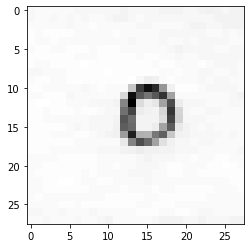

In [ ]:
## Displaying a NumtaDB Image
# Label
print("Label:")
print(train_dataset[7][1])

show_img = train_dataset[7][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

Using the **matplotlib** python package 25 images of the training dataset are displayed.



In [ ]:
def plot_images(images):

    n_images = len(images)

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure()
    for i in range(rows*cols):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(images[i].view(28, 28).cpu().numpy(), cmap = 'bone')
        ax.axis('off')

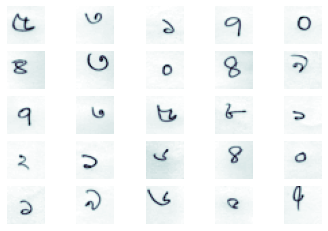

In [ ]:
N_IMAGES =25

images = [image for image, label in [train_dataset[i] for i in range(N_IMAGES)]] 

plot_images(images)

## Defining the Model 

Our model will be a neural network, with different hypermeter settings. 

### Expanding Neural Network variants

There are **2 ways** to expand a neural network
- Different non-linear activation
- More hidden layers

The image below shows the archicture of the model we will take in our first setting. It is a 3 layer deep neural network. with 784(28*28) inputs and 10 ouputs and 3 hidden layer in between.

<div align="center">
<img src="https://drive.google.com/uc?export=view&id=1fUWIS2OZDG970lFMEhGM0c8spo-Zx0FD" width="500">
</div>


At first we will **flatten** our 1x28x28 (1 color channel, 28 pixels height and width) image into a 784 element vector, also called 784 *features*. Next, the 784 dimensional input is passed through the first hidden layer to transform it into 64 dimensions. Then these output is passed to each neuron of 2nd hidden layer. similar occurence happen from 2nd to 3rd hidden layer.  Finally, an output layer which will transform it into a 10 dimensional vector. Each hidden layers are fully connected to the other. The output dimension should equal the number of classes within our data. Here we have ten digits, 0 - 9, so need our output to be 10 dimensions.

The transformation between 784 to 64, 64 to 64, 64 to 64  and 64 to 10 dimensions are done by **`Linear`** layers. These are also known as fully connected or affine layers. In these layers every element in one layer is connected to every element in the next. These elements can be visualised ***neurons*** as this architecture is inspired by how the human brain is made of millions of interconnected nodes, also called neurons. 



Now we are going to try out different setting to get the best accuracy.

## Setting_1: **3 Layer** Deep Neural Network with **ReLU** Activation.
### **Parameters**
- **totaldata:** 72,045
- **minibatch:** 128
- **iterations:**14,000
- **learning rate**: 0.05
-**Hidden Layer:** 64
-  **epochs** = $iterations \div \frac{totaldata}{minibatch} = 14000 \div \frac{72045}{128} = 24.87\approx 24$
- **Input dimension:** $28 \times 28 = 784$
- **Output dimension: 10**
  - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
-**Accuracy:** 68.76%

In [ ]:
# Hyperparameters
batch_size = 128
num_iters = 14000
input_dim = 28*28 # num_features = 784
num_hidden = 64
output_dim = 10
learning_rate = 0.05

Now for testing purpose the training data is split into 90:10 ratio. The testing set which is of 10% should be created from the training set. Although there is a test set present in the NumtaDB dataset, the test set maybe not be same for the specific training set. That is why the validation set or training set is made form the training set.

It is always better to **shuffle the indices of the training set** .We only need to shuffle our training set as it will be used for stochastic gradient descent and we want the each batch to be different between epochs. 

`DataLoader`  is defined for each of the training/test sets. We can iterate over these and they will yield batches of images and labels which we can use to train our model.

In [ ]:

#batch size
batch_size =128

# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_dataset)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:507
Test dataloader:57


#### Step #1 : Design model using class



*   Using RelU activation function in each hidden layer.
*   3 hidden layer neural model is built.






In [ ]:
class DeepNeuralNetworkModel32(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_3 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3 hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_3(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas



We place our model and criterion on to the device by using the `.to` method. We then define `device`. This is used to place your model and data on to a GPU, if you have one.

In [ ]:
model = DeepNeuralNetworkModel32(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)


DeepNeuralNetworkModel32(
  (linear_1): Linear(in_features=784, out_features=64, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=64, out_features=64, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=64, out_features=64, bias=True)
  (relu_3): ReLU()
  (linear_out): Linear(in_features=64, out_features=10, bias=True)
)


###Step #2 : Construct loss and optimizer

Unlike linear regression, we do not use **MSE** here, we need **Cross Entropy Loss** to calculate our loss before we backpropagate and update our parameters.

`criterion = nn.CrossEntropyLoss() ` 

It does 2 things at the same time.

1. Computes ReLU activation function.
2. Computes Cross Entropy Loss


The ReLU activation function is a popular non-linear function that is simply **$max(0, x)$**, where $x$ is the weighted sum of the inputs to that neuron. Other activation functions used are hyperbolic tan (tanh) and sigmoid function, however ReLU is the most commonly used.

![](https://github.com/bentrevett/pytorch-image-classification/blob/master/assets/relu.png?raw=1)


One thing to note is that we do not use an activation function on the input directly or on the output. Activation functions **should never** be used directly on the input. PyTorch combines activation functions to be applied on the output with the functions which calculate the *loss*, also known as *error* or *cost*, of a neural network. This is done for numerical stability.


Next, our optimizer needs to be defined which will update the parameters of our model with respect to the loss calculated on the data. Here we used Stochastic gradient descent(SGD) as our optimizer that makes forward and backward propagation for every record.

SGD algorithm is used with its default parameters and learning rate passed in it. Although there are different optimizers SGD can work well for logistic regression. There are more optimizers that can be experimented in this [article](https://ruder.io/optimizing-gradient-descent/).

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [ ]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

24


###Step #3: Training the model: forward, loss, backward, step




  



In [ ]:

iter = 0
iteration_loss = []
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.9550752639770508. Accuracy: 25.860632981676847
Iteration: 1000. Loss: 1.801732063293457. Accuracy: 28.678511937812328
Iteration: 1500. Loss: 1.7477679252624512. Accuracy: 36.1188228761799
Iteration: 2000. Loss: 1.7116748094558716. Accuracy: 44.003331482509715
Iteration: 2500. Loss: 1.5776315927505493. Accuracy: 43.03164908384231
Iteration: 3000. Loss: 1.6777348518371582. Accuracy: 41.935036091060525
Iteration: 3500. Loss: 1.635998010635376. Accuracy: 41.86563020544142
Iteration: 4000. Loss: 1.3812156915664673. Accuracy: 43.04553026096613
Iteration: 4500. Loss: 1.3871617317199707. Accuracy: 46.23820099944475
Iteration: 5000. Loss: 1.3996976613998413. Accuracy: 51.97112715158245
Iteration: 5500. Loss: 1.5606170892715454. Accuracy: 47.18212104386452
Iteration: 6000. Loss: 1.3085559606552124. Accuracy: 53.05385896724042
Iteration: 6500. Loss: 1.4007232189178467. Accuracy: 56.621321488062186
Iteration: 7000. Loss: 1.5060296058654785. Accuracy: 49.48639644641866
Itera

### Step#4: Graph Plot of loss function with each iteration.

[1.9550752639770508, 1.801732063293457, 1.7477679252624512, 1.7116748094558716, 1.5776315927505493, 1.6777348518371582, 1.635998010635376, 1.3812156915664673, 1.3871617317199707, 1.3996976613998413, 1.5606170892715454, 1.3085559606552124, 1.4007232189178467, 1.5060296058654785, 1.4459973573684692, 1.1788666248321533, 1.1434062719345093, 1.1878690719604492, 1.1693838834762573, 0.9816633462905884, 1.0260924100875854, 1.2215993404388428, 0.8985801339149475, 1.1685233116149902]


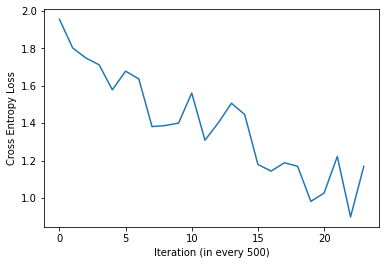

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

Saving the model 

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

root_path = '/content/gdrive/MyDrive/4.2/sc/'

Mounted at /content/gdrive


In [ ]:
import pickle
save_model = True


if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'Relu3_55.pkl') 

## Setting_2: **3 Layer** Deep Neural Network with **ReLU** Activation.
### **Parameters**
- **totaldata:** 72,045
- **minibatch:** 220
- **iterations:**15,000
-**Hidden Layer:** 170
- **learning rate**: 0.05
-  **epochs** = $iterations \div \frac{totaldata}{minibatch} = 15000 \div \frac{72045}{220} = 45.03\approx 45$
- **Input dimension:** $28 \times 28 = 784$
- **Output dimension: 10**
  - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
-**Accuracy:** 76.90%

In [ ]:
# Hyperparameters
batch_size = 220
num_iters = 15000
input_dim = 28*28 # num_features = 784
num_hidden =170
output_dim = 10
learning_rate = 0.05


In [ ]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

45


Now for testing purpose the training data is split into 90:10 ratio. The testing set which is of 10% should be created from the training set. Although there is a test set present in the NumtaDB dataset, the test set maybe not be same for the specific training set. That is why the validation set or training set is made form the training set.

It is always better to **shuffle the indices of the training set** .We only need to shuffle our training set as it will be used for stochastic gradient descent and we want the each batch to be different between epochs. 

`DataLoader`  is defined for each of the training/test sets. We can iterate over these and they will yield batches of images and labels which we can use to train our model.

In [ ]:

#batch size
batch_size =220

# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_dataset)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:295
Test dataloader:33


#### Step #1 : Design model using class



*   Using ReLU activation function in each hidden layer.
*   3 hidden layer neural model is built.






In [ ]:
class DeepNeuralNetworkModel32(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_3 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3 hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_3(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas



We place our model and criterion on to the device by using the `.to` method. We then define `device`. This is used to place your model and data on to a GPU, if you have one.

In [ ]:
model = DeepNeuralNetworkModel32(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)


DeepNeuralNetworkModel32(
  (linear_1): Linear(in_features=784, out_features=170, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=170, out_features=170, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=170, out_features=170, bias=True)
  (relu_3): ReLU()
  (linear_out): Linear(in_features=170, out_features=10, bias=True)
)


###Step #2 : Construct loss and optimizer

Unlike linear regression, we do not use **MSE** here, we need **Cross Entropy Loss** to calculate our loss before we backpropagate and update our parameters.

`criterion = nn.CrossEntropyLoss() ` 

It does 2 things at the same time.

1. Computes ReLU activation function.
2. Computes Cross Entropy Loss


The ReLU activation function is a popular non-linear function that is simply **$max(0, x)$**, where $x$ is the weighted sum of the inputs to that neuron. Other activation functions used are hyperbolic tan (tanh) and sigmoid function, however ReLU is the most commonly used.

![](https://github.com/bentrevett/pytorch-image-classification/blob/master/assets/relu.png?raw=1)


One thing to note is that we do not use an activation function on the input directly or on the output. Activation functions **should never** be used directly on the input. PyTorch combines activation functions to be applied on the output with the functions which calculate the *loss*, also known as *error* or *cost*, of a neural network. This is done for numerical stability.


Next, our optimizer needs to be defined which will update the parameters of our model with respect to the loss calculated on the data. Here we used Stochastic gradient descent(SGD) as our optimizer that makes forward and backward propagation for every record.

SGD algorithm is used with its default parameters and learning rate passed in it. Although there are different optimizers SGD can work well for logistic regression. There are more optimizers that can be experimented in this [article](https://ruder.io/optimizing-gradient-descent/).

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


###Step #3: Training the model: forward, loss, backward, step




  



In [ ]:

iter = 0
iteration_loss = []
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.6348820924758911. Accuracy: 42.42087729039422
Iteration: 1000. Loss: 1.7943857908248901. Accuracy: 41.53248195446974
Iteration: 1500. Loss: 1.7608619928359985. Accuracy: 42.30982787340366
Iteration: 2000. Loss: 1.6637048721313477. Accuracy: 37.021099389228205
Iteration: 2500. Loss: 1.3933546543121338. Accuracy: 51.67962243198223
Iteration: 3000. Loss: 1.380417823791504. Accuracy: 52.151582454192116
Iteration: 3500. Loss: 1.3191003799438477. Accuracy: 53.678511937812324
Iteration: 4000. Loss: 1.2376786470413208. Accuracy: 55.95502498611882
Iteration: 4500. Loss: 1.0707937479019165. Accuracy: 58.18989450305386
Iteration: 5000. Loss: 1.1645231246948242. Accuracy: 51.88784008883953
Iteration: 5500. Loss: 1.3132669925689697. Accuracy: 49.80566352026652
Iteration: 6000. Loss: 1.276214599609375. Accuracy: 67.32370905052748
Iteration: 6500. Loss: 1.268231987953186. Accuracy: 63.395335924486396
Iteration: 7000. Loss: 0.9807599186897278. Accuracy: 54.747362576346475
Itera

### Step#4: Graph Plot of loss function with each iteration.

[1.6348820924758911, 1.7943857908248901, 1.7608619928359985, 1.6637048721313477, 1.3933546543121338, 1.380417823791504, 1.3191003799438477, 1.2376786470413208, 1.0707937479019165, 1.1645231246948242, 1.3132669925689697, 1.276214599609375, 1.268231987953186, 0.9807599186897278, 1.169082760810852, 0.9555444717407227, 0.8094890117645264, 0.7772756814956665, 0.8015124797821045, 0.7869443297386169, 0.7631442546844482, 0.6176759600639343, 0.7272005081176758, 0.5775402188301086, 0.5897836685180664, 0.5932936072349548]


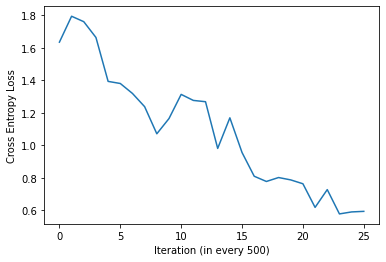

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

root_path = '/content/gdrive/MyDrive/4.2/sc/'

Mounted at /content/gdrive


In [ ]:
import pickle
save_model = True


if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'Relu3_55.pkl') 


## Setting_3: **5 Layer** Deep Neural Network with **Tanh** Activation.
### **Parameters**
- **totaldata:** 72,045
- **minibatch:** 220
- **iterations:**14,000
- **learning rate**: 0.1
-**Hidden Layer:** 150
-  **epochs** = $iterations \div \frac{totaldata}{minibatch} = 14000 \div \frac{72045}{128} = 45.33\approx 45$
- **Input dimension:** $28 \times 28 = 784$
- **Output dimension: 10**
  - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
-**Accuracy:** 74.66%

In [ ]:
# Hyperparameters
batch_size = 220
num_iters = 15000
input_dim = 28*28 # num_features = 784
num_hidden = 150
output_dim = 10
learning_rate = 0.1

In [ ]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

45


Now for testing purpose the training data is split into 90:10 ratio. The testing set which is of 10% should be created from the training set. Although there is a test set present in the NumtaDB dataset, the test set maybe not be same for the specific training set. That is why the validation set or training set is made form the training set.

It is always better to **shuffle the indices of the training set** .We only need to shuffle our training set as it will be used for stochastic gradient descent and we want the each batch to be different between epochs. 

`DataLoader`  is defined for each of the training/test sets. We can iterate over these and they will yield batches of images and labels which we can use to train our model.

In [ ]:

#batch size
batch_size =220

# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_dataset)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:295
Test dataloader:33


#### Step #1 : Design model using class



*   Using Tanh activation function in each hidden layer.
*   5 hidden layer neural model is built.






In [ ]:
class DeepNeuralNetworkModel55(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 128
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.Tanh_1 = nn.Tanh()

        ### 2nd hidden layer: 128--> 128
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.Tanh_2 = nn.Tanh()

        ### 3rd hidden layer: 128--> 128
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.Tanh_3 = nn.Tanh()

        ### 4th hidden layer: 128--> 128
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.Tanh_4 = nn.Tanh()
        ### 4th hidden layer: 128--> 128
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.Tanh_5 = nn.Tanh()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.Tanh_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.Tanh_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd  hidden layer
        out = self.Tanh_3(out)

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.Tanh_4(out)

  
        ### 4th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 4th hidden layer
        out = self.Tanh_5(out)      

        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [ ]:
model = DeepNeuralNetworkModel55(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)


DeepNeuralNetworkModel55(
  (linear_1): Linear(in_features=784, out_features=150, bias=True)
  (Tanh_1): Tanh()
  (linear_2): Linear(in_features=150, out_features=150, bias=True)
  (Tanh_2): Tanh()
  (linear_3): Linear(in_features=150, out_features=150, bias=True)
  (Tanh_3): Tanh()
  (linear_4): Linear(in_features=150, out_features=150, bias=True)
  (Tanh_4): Tanh()
  (linear_5): Linear(in_features=150, out_features=150, bias=True)
  (Tanh_5): Tanh()
  (linear_out): Linear(in_features=150, out_features=10, bias=True)
)


###Step #2 : Construct loss and optimizer

Unlike linear regression, we do not use **MSE** here, we need **Cross Entropy Loss** to calculate our loss before we backpropagate and update our parameters.

`criterion = nn.CrossEntropyLoss() ` 

It does 2 things at the same time.

1. Computes Tanh activation function.
2. Computes Cross Entropy Loss

The Tanh activation function is  structure similar to sigmoid function. In this case it is a range of values from -1 to 1.
*   The advantage over the sigmoid function is that its derivative is more steep, which means it can get
more value.
*   This means that it will be more efficient
because it has a wider range for faster learning
and grading
and grading
<div align="center">
<img src="https://drive.google.com/uc?export=view&id=1FeIw7AjRnoCSNG3DiU3j6QhUi-k_d9vr" width="500">
</div>



One thing to note is that we do not use an activation function on the input directly or on the output. Activation functions **should never** be used directly on the input. PyTorch combines activation functions to be applied on the output with the functions which calculate the *loss*, also known as *error* or *cost*, of a neural network. This is done for numerical stability.


Next, our optimizer needs to be defined which will update the parameters of our model with respect to the loss calculated on the data. Here we used Stochastic gradient descent(SGD) as our optimizer that makes forward and backward propagation for every record.

SGD algorithm is used with its default parameters and learning rate passed in it. Although there are different optimizers SGD can work well for logistic regression. There are more optimizers that can be experimented in this [article](https://ruder.io/optimizing-gradient-descent/).

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


###Step #3: Training the model: forward, loss, backward, step




  



In [ ]:

iter = 0
iteration_loss = []
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

45
Iteration: 500. Loss: 2.0174291133880615. Accuracy: 24.153248195446974
Iteration: 1000. Loss: 1.8696274757385254. Accuracy: 30.233203775680177
Iteration: 1500. Loss: 2.0625219345092773. Accuracy: 32.00999444752915
Iteration: 2000. Loss: 1.8677068948745728. Accuracy: 37.978900610771795
Iteration: 2500. Loss: 1.6947197914123535. Accuracy: 33.078845086063296
Iteration: 3000. Loss: 1.8747432231903076. Accuracy: 34.55024986118823
Iteration: 3500. Loss: 1.6229861974716187. Accuracy: 43.406440866185456
Iteration: 4000. Loss: 1.5710086822509766. Accuracy: 50.166574125485845
Iteration: 4500. Loss: 1.5252765417099. Accuracy: 46.807329261521375
Iteration: 5000. Loss: 1.632218599319458. Accuracy: 44.641865630205444
Iteration: 5500. Loss: 1.350671648979187. Accuracy: 54.59466962798445
Iteration: 6000. Loss: 1.2061541080474854. Accuracy: 57.05163797890061
Iteration: 6500. Loss: 1.3243834972381592. Accuracy: 50.95780122154358
Iteration: 7000. Loss: 1.398995280265808. Accuracy: 47.556912826207665
I

### Step#4: Graph Plot of loss function with each iteration.

[2.0174291133880615, 1.8696274757385254, 2.0625219345092773, 1.8677068948745728, 1.6947197914123535, 1.8747432231903076, 1.6229861974716187, 1.5710086822509766, 1.5252765417099, 1.632218599319458, 1.350671648979187, 1.2061541080474854, 1.3243834972381592, 1.398995280265808, 1.3465567827224731, 1.1463468074798584, 1.271712303161621, 0.9293833374977112, 1.2297449111938477, 1.0914922952651978, 1.0419710874557495, 0.9871897101402283, 0.7532513737678528, 0.6881396174430847, 0.7428221702575684, 0.6086288690567017]


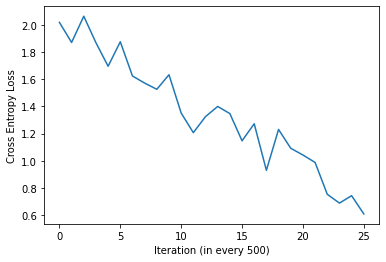

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

root_path = '/content/gdrive/MyDrive/4.2/sc/'

Mounted at /content/gdrive


In [ ]:
import pickle
save_model = True


if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'Relu_4Layer_128.pkl') 


## Setting_4: **5 Layer** Deep Neural Network with **ReLU** Activation.
### **Parameters**
- **totaldata:** 72,045
- **minibatch:** 250
- **iterations:**14,000
- **learning rate**: 0.1
-**Hidden Layer:** 64
-  **epochs** = $iterations \div \frac{totaldata}{minibatch} = 14000 \div \frac{72045}{250} = 48.58\approx 48$
- **Input dimension:** $28 \times 28 = 784$
- **Output dimension: 10**
  - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
-**Accuracy:** 69.76%

In [ ]:
# Hyperparameters
batch_size =250
num_iters =14000
input_dim = 28*28 # num_features = 784
num_hidden = 64
output_dim = 10
learning_rate = 0.1

In [ ]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

48


Now for testing purpose the training data is split into 90:10 ratio. The testing set which is of 10% should be created from the training set. Although there is a test set present in the NumtaDB dataset, the test set maybe not be same for the specific training set. That is why the validation set or training set is made form the training set.

It is always better to **shuffle the indices of the training set** .We only need to shuffle our training set as it will be used for stochastic gradient descent and we want the each batch to be different between epochs. 

`DataLoader`  is defined for each of the training/test sets. We can iterate over these and they will yield batches of images and labels which we can use to train our model.

In [ ]:

#batch size
batch_size =250

# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_dataset)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:260
Test dataloader:29


#### Step #1 : Design model using class
*   Using ReLU activation function in each hidden layer.
*   5 hidden layer neural model is built.

In [ ]:
class DeepNeuralNetworkModel5(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 128
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 128--> 128
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 128--> 128
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 128--> 128
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_4 = nn.ReLU()

        ### 4th hidden layer: 128--> 128
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_5 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd  hidden layer
        out = self.relu_3(out)

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)

         ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_5(out)       

        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [ ]:
model = DeepNeuralNetworkModel5(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)


DeepNeuralNetworkModel5(
  (linear_1): Linear(in_features=784, out_features=64, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=64, out_features=64, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=64, out_features=64, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=64, out_features=64, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=64, out_features=64, bias=True)
  (relu_5): ReLU()
  (linear_out): Linear(in_features=64, out_features=10, bias=True)
)


###Step #2 : Construct loss and optimizer

Unlike linear regression, we do not use **MSE** here, we need **Cross Entropy Loss** to calculate our loss before we backpropagate and update our parameters.

`criterion = nn.CrossEntropyLoss() ` 

It does 2 things at the same time.

1. Computes ReLU activation function.
2. Computes Cross Entropy Loss


The ReLU activation function is a popular non-linear function that is simply **$max(0, x)$**, where $x$ is the weighted sum of the inputs to that neuron. Other activation functions used are hyperbolic tan (tanh) and sigmoid function, however ReLU is the most commonly used.

![](https://github.com/bentrevett/pytorch-image-classification/blob/master/assets/relu.png?raw=1)


One thing to note is that we do not use an activation function on the input directly or on the output. Activation functions **should never** be used directly on the input. PyTorch combines activation functions to be applied on the output with the functions which calculate the *loss*, also known as *error* or *cost*, of a neural network. This is done for numerical stability.


Next, our optimizer needs to be defined which will update the parameters of our model with respect to the loss calculated on the data. Here we used Stochastic gradient descent(SGD) as our optimizer that makes forward and backward propagation for every record.

SGD algorithm is used with its default parameters and learning rate passed in it. Although there are different optimizers SGD can work well for logistic regression. There are more optimizers that can be experimented in this [article](https://ruder.io/optimizing-gradient-descent/).

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


###Step #3 : Training: forward, loss, backward, step

In [ ]:

iter = 0
iteration_loss = []
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.0158450603485107. Accuracy: 22.001665741254858
Iteration: 1000. Loss: 1.7672572135925293. Accuracy: 34.14769572459745
Iteration: 1500. Loss: 1.8478646278381348. Accuracy: 32.88450860632982
Iteration: 2000. Loss: 1.8140966892242432. Accuracy: 38.96446418656302
Iteration: 2500. Loss: 1.9957859516143799. Accuracy: 31.079955580233204
Iteration: 3000. Loss: 1.5967625379562378. Accuracy: 41.67129372570794
Iteration: 3500. Loss: 1.675837516784668. Accuracy: 46.64075513603554
Iteration: 4000. Loss: 2.075779676437378. Accuracy: 34.633536923931146
Iteration: 4500. Loss: 1.5270226001739502. Accuracy: 42.82343142698501
Iteration: 5000. Loss: 1.4030970335006714. Accuracy: 47.26540810660744
Iteration: 5500. Loss: 1.5600489377975464. Accuracy: 45.58578567462521
Iteration: 6000. Loss: 1.217861294746399. Accuracy: 53.900610771793446
Iteration: 6500. Loss: 1.2798672914505005. Accuracy: 48.486951693503606
Iteration: 7000. Loss: 1.4346414804458618. Accuracy: 56.52415324819545
Itera

### Step#4: Graph Plot of loss function with each iteration.

[2.0158450603485107, 1.7672572135925293, 1.8478646278381348, 1.8140966892242432, 1.9957859516143799, 1.5967625379562378, 1.675837516784668, 2.075779676437378, 1.5270226001739502, 1.4030970335006714, 1.5600489377975464, 1.217861294746399, 1.2798672914505005, 1.4346414804458618, 1.4544739723205566, 1.0559537410736084, 1.3811649084091187, 1.25596022605896, 1.5171899795532227, 0.96547931432724, 0.9313546419143677, 0.8950483798980713, 0.8706270456314087, 0.8565341234207153]


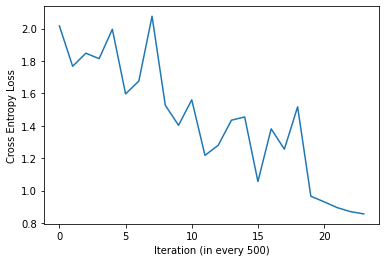

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

root_path = '/content/gdrive/MyDrive/4.2/sc/'

Mounted at /content/gdrive


In [ ]:
import pickle
save_model = True


if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'Relu_5Layer_250.pkl') 

## **Result Analysis**

The hyperparameters are varied and tried out for different possibilities to get the best result. The following comparisions are seen while testing the dataset.

1. **Batch size**: A hyperparameter of gradient descent 

2. **Hidden Layers**: The increase or decrease in hidden layer change the accuracy of the model. There should be a balance between the batch size and hidden layer. The hidden layers shouldnt be made complex for easier computations.

3. **Epoch**: A hyperparameter that controls the number of complete passes through the training dataset. 
4. **Learning rate**: The amount with which the weights are updated to help the gradient descent converge.
5. **Iteration:** The number of batches needed to complete one epoch.
6. **Accuracy:** An evaluation metric used to predict the correctness of a machine learning model.





|Setting|   Mini-Batch Size | No of Neurons   | Iterations   | Learning Rate| Accuracy| Num of Epochs    |
| :-------------:| :-------------:| :-------------:| :----------: | :-----------:|:-----------:|:-----------:|
|1|     128   | 64    | 14000        | 0.05       |68.76%     |24            |
|2| 220    |170        | 15000         | 0.05        |**74.19%**       |45        |
|3|220      |150        |14000          | 0.1        |74.12%       |45          |
|4|250      |64      |14000        | 0.1        |69.03%       |48         |


###**3 hidden layers**
Here, for setting 1 and 2, **three** layer deep neural network is used varying the batch size and no of neurons in hidden layer keeping the learning rate same and iteration almost similar. Smaller **batch sizes** train slower, but can converge faster compared to larger batch size. The **learning rate** is kept average as bigger batch size jump further and can miss the local minima. By observing the the accuracy change we can see that for each 500th iteration for both the cases the accuracy is being increased and loss is decreasing. This shows that there were low errors on training the data.  
<div align="center">
<img src="https://drive.google.com/uc?export=view&id=1vcEpsrzQW3ysxr3RdKjo6hM17eeHwK6c" width="500">
</div>


If we look at the loss vs iteration graph for these 2 setting we can see that for both cases the loss decreases with the iteration. Which shows it is not overfitted as there are no high amount of spikes.

###**5 hidden layers**
Here, for setting 2 and 3, **five** layer deep neural network is used varying no of neurons in hidden layer keeping the learning rate same, and iteration and batch size almost similar. Larger **batch sizes** train faster, as it is a huge model we want to traing it comparitively faster. The **learning rate** is kept a little higher as there are many hidden layers. So, even if the local minima is missed in one layer it can work better for the other layer. By observing the the accuracy change we can see that for each 500th iteration for both the cases the accuracy is being increased and loss is decreasing. This shows that there were low errors on training the data.  



<div align="center">
<img src="https://drive.google.com/uc?export=view&id=1Ef_nQPD6oEawwB8XwrsEdzoPofUC1REL" width="500">
</div>

If we look at the loss vs iteration graph for these 2 setting we can see that for both cases the loss decreases with the iteration. Which shows it is not overfitted as there are no high amount of spikes.

##Conclusion
There is no magic formula to tell us how many layers to use and how many neurons to have in each layer and there is most probably a better set of values. However, the general idea is that neural networks extract features from data. Layers closer to the input learn to extract general features (e.g. lines, curves, edges), whilst later layers combine the features extracted from the previous layer into more high level features (e.g. the intersection of two lines making a cross, multiple curves make a circle). We force our neural network to learn these features. This way it has to learn to compress information by extracting only the useful and general features. Thus, we want a neural network with multiple layers and some sort of information compression (reduced number of neurons in subsequent layers).